In [1]:
from google.colab import files
files.upload()

Saving Crop_recommendation.csv to Crop_recommendation.csv


{'Crop_recommendation.csv': b'N,P,K,temperature,humidity,ph,rainfall,label\r\n90,42,43,20.87974371,82.00274423,6.502985292000001,202.9355362,rice\r\n85,58,41,21.77046169,80.31964408,7.038096361,226.6555374,rice\r\n60,55,44,23.00445915,82.3207629,7.840207144,263.9642476,rice\r\n74,35,40,26.49109635,80.15836264,6.980400905,242.8640342,rice\r\n78,42,42,20.13017482,81.60487287,7.628472891,262.7173405,rice\r\n69,37,42,23.05804872,83.37011772,7.073453503,251.0549998,rice\r\n69,55,38,22.70883798,82.63941394,5.70080568,271.3248604,rice\r\n94,53,40,20.27774362,82.89408619,5.718627177999999,241.9741949,rice\r\n89,54,38,24.51588066,83.53521629999999,6.685346424,230.4462359,rice\r\n68,58,38,23.22397386,83.03322691,6.336253525,221.2091958,rice\r\n91,53,40,26.52723513,81.41753846,5.386167788,264.6148697,rice\r\n90,46,42,23.97898217,81.45061596,7.50283396,250.0832336,rice\r\n78,58,44,26.80079604,80.88684822,5.108681786,284.4364567,rice\r\n93,56,36,24.01497622,82.05687182,6.98435366,185.2773389,rice\r

In [2]:
# libraries
from __future__ import print_function
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn import tree
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('Crop_recommendation.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [6]:
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [7]:
df['label'].unique()

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

<Axes: >

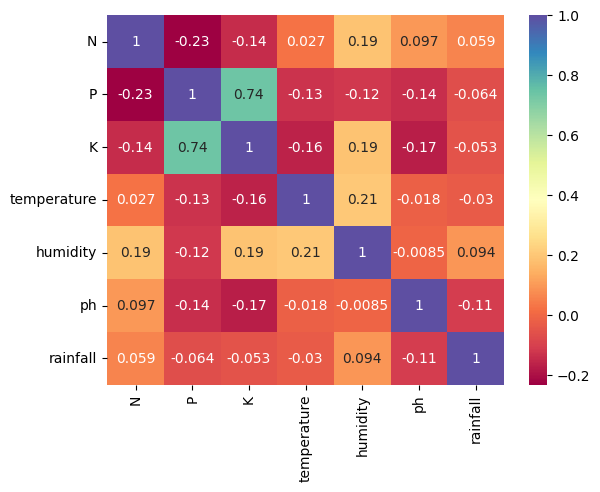

In [24]:
sns.heatmap(df.corr(),annot=True, cmap='Spectral')

In [9]:
features = df[['N', 'P','K','temperature', 'humidity', 'ph', 'rainfall']]
target = df['label']
labels = df['label']

In [11]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, Ytrain, Ytest = train_test_split(features,target,test_size = 0.2,random_state =69)

Models

In [13]:
# empty lists to append model's name and corresponding name
acc = []
model = []

### Decision Tree

In [14]:
from sklearn.tree import DecisionTreeClassifier

DecisionTree = DecisionTreeClassifier(criterion="entropy",random_state=2,max_depth=5)

DecisionTree.fit(Xtrain,Ytrain)

predicted_values = DecisionTree.predict(Xtest)
x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('Decision Tree')
print("DecisionTrees's Accuracy is: ", x*100)

print(classification_report(Ytest,predicted_values))

DecisionTrees's Accuracy is:  92.95454545454545
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        19
      banana       1.00      1.00      1.00        18
   blackgram       0.56      1.00      0.72        14
    chickpea       1.00      1.00      1.00        25
     coconut       1.00      1.00      1.00        23
      coffee       1.00      0.93      0.96        14
      cotton       1.00      1.00      1.00        18
      grapes       1.00      1.00      1.00        28
        jute       1.00      0.33      0.50        18
 kidneybeans       1.00      0.94      0.97        16
      lentil       0.75      1.00      0.86        12
       maize       0.88      0.96      0.92        24
       mango       1.00      0.96      0.98        25
   mothbeans       1.00      0.32      0.48        22
    mungbean       1.00      1.00      1.00        20
   muskmelon       1.00      1.00      1.00        19
      orange       1.00      1.00

In [17]:
# Cross validation
from sklearn.model_selection import cross_val_score
score = cross_val_score(DecisionTree, features, target,cv=5)
score

array([0.93636364, 0.90909091, 0.91818182, 0.87045455, 0.93636364])

In [19]:
# Saving model
import pickle
DT_pkl_filename = 'decision_tree.pkl'
# Open the file to save as pkl file
DT_Model_pkl = open(DT_pkl_filename, 'wb')
pickle.dump(DecisionTree, DT_Model_pkl)
# Close the pickle instances
DT_Model_pkl.close()

### Random Forest

In [20]:
from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier(n_estimators=20, random_state=0)
RF.fit(Xtrain,Ytrain)

predicted_values = RF.predict(Xtest)

x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('RF')
print("RF's Accuracy is: ", x)

print(classification_report(Ytest,predicted_values))

RF's Accuracy is:  0.9954545454545455
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        19
      banana       1.00      1.00      1.00        18
   blackgram       1.00      1.00      1.00        14
    chickpea       1.00      1.00      1.00        25
     coconut       1.00      1.00      1.00        23
      coffee       1.00      1.00      1.00        14
      cotton       1.00      1.00      1.00        18
      grapes       1.00      1.00      1.00        28
        jute       0.95      1.00      0.97        18
 kidneybeans       1.00      1.00      1.00        16
      lentil       0.92      1.00      0.96        12
       maize       1.00      1.00      1.00        24
       mango       1.00      1.00      1.00        25
   mothbeans       1.00      0.95      0.98        22
    mungbean       1.00      1.00      1.00        20
   muskmelon       1.00      1.00      1.00        19
      orange       1.00      1.00      1.00

In [21]:
score = cross_val_score(RF,features,target,cv=5)
score

array([0.99772727, 0.99545455, 0.99772727, 0.99318182, 0.98863636])

### SVM

In [22]:
from sklearn.svm import SVC

SVM = SVC(gamma='auto')

SVM.fit(Xtrain,Ytrain)

predicted_values = SVM.predict(Xtest)

x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('SVM')
print("SVM's Accuracy is: ", x)

print(classification_report(Ytest,predicted_values))

SVM's Accuracy is:  0.08636363636363636
              precision    recall  f1-score   support

       apple       1.00      0.05      0.10        19
      banana       1.00      0.17      0.29        18
   blackgram       1.00      0.29      0.44        14
    chickpea       1.00      0.04      0.08        25
     coconut       1.00      0.04      0.08        23
      coffee       0.00      0.00      0.00        14
      cotton       0.00      0.00      0.00        18
      grapes       0.00      0.00      0.00        28
        jute       1.00      0.06      0.11        18
 kidneybeans       1.00      0.06      0.12        16
      lentil       0.03      1.00      0.06        12
       maize       0.00      0.00      0.00        24
       mango       0.00      0.00      0.00        25
   mothbeans       0.00      0.00      0.00        22
    mungbean       1.00      0.15      0.26        20
   muskmelon       1.00      0.47      0.64        19
      orange       0.00      0.00      0.

In [23]:
score = cross_val_score(SVM,features,target,cv=5)
score

array([0.27727273, 0.28863636, 0.29090909, 0.275     , 0.26818182])